<a href="https://colab.research.google.com/github/mohd-faizy/07P_Exploratory_Data_Analysis_With_Seaborn/blob/master/03_Tumor_Diagnosis_PCA_Part_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# __Tumor Diagnosis: Part-3 Machine Learning & Data Preprocessing Using PCA Algorithm__


In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_data_B.csv to breast_cancer_data_B.csv


In [3]:
# Importing the dataset
df = pd.read_csv('/content/breast_cancer_data_B.csv')

In [4]:
df.shape

(699, 11)

In [5]:
df.head(10)

,id,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,1000025,5,1,1,1,2,1,3,1,1,0
1,1002945,5,4,4,5,7,10,3,2,1,0
2,1015425,3,1,1,1,2,2,3,1,1,0
3,1016277,6,8,8,1,3,4,3,7,1,0
4,1017023,4,1,1,3,2,1,3,1,1,0
5,1017122,8,10,10,8,7,10,9,7,1,1
6,1018099,1,1,1,1,2,10,3,1,1,0
7,1018561,2,1,2,1,2,1,3,1,1,0
8,1033078,2,1,1,1,2,1,1,1,5,0
9,1033078,4,2,1,1,2,1,2,1,1,0


In [6]:
# feature names as a list
col_name_list = df.columns     # .columns gives columns names in data 
print(col_name_list)

Index(['id', 'clump_thickness', 'unif_cell_size', 'unif_cell_shape',
       'marg_adhesion', 'single_epith_cell_size', 'bare_nuclei', 'bland_chrom',
       'norm_nucleoli', 'mitoses', 'classes'],
      dtype='object')


In [7]:
df.replace('?',-99999,inplace=True) # Will replace  '?' value in dataframe with value -99999 
df.drop(['id'],1,inplace=True)
X=np.array(df.drop(['classes'],1))
y=np.array(df['classes'])

- When `inplace = True` is used, it performs operation on data and $Nothing$ is returned.
- When `inplace = False` is used, it performs operation on data and returns a $New$ copy of data.


In [8]:
df.shape

(699, 10)

In [9]:
df.head(10)

,clump_thickness,unif_cell_size,unif_cell_shape,marg_adhesion,single_epith_cell_size,bare_nuclei,bland_chrom,norm_nucleoli,mitoses,classes
0,5,1,1,1,2,1,3,1,1,0
1,5,4,4,5,7,10,3,2,1,0
2,3,1,1,1,2,2,3,1,1,0
3,6,8,8,1,3,4,3,7,1,0
4,4,1,1,3,2,1,3,1,1,0
5,8,10,10,8,7,10,9,7,1,1
6,1,1,1,1,2,10,3,1,1,0
7,2,1,2,1,2,1,3,1,1,0
8,2,1,1,1,2,1,1,1,5,0
9,4,2,1,1,2,1,2,1,1,0


In [10]:
print("Number of Data Points: {}".format(df.shape[0])) #print number of data points
print("Number of Features/Attributes: {}".format(df.shape[1])) # print number of features
print("Features/Attributes:", df.columns) # print the list of all features in the dataset 

Number of Data Points: 699
Number of Features/Attributes: 10
Features/Attributes: Index(['clump_thickness', 'unif_cell_size', 'unif_cell_shape', 'marg_adhesion',
       'single_epith_cell_size', 'bare_nuclei', 'bland_chrom', 'norm_nucleoli',
       'mitoses', 'classes'],
      dtype='object')


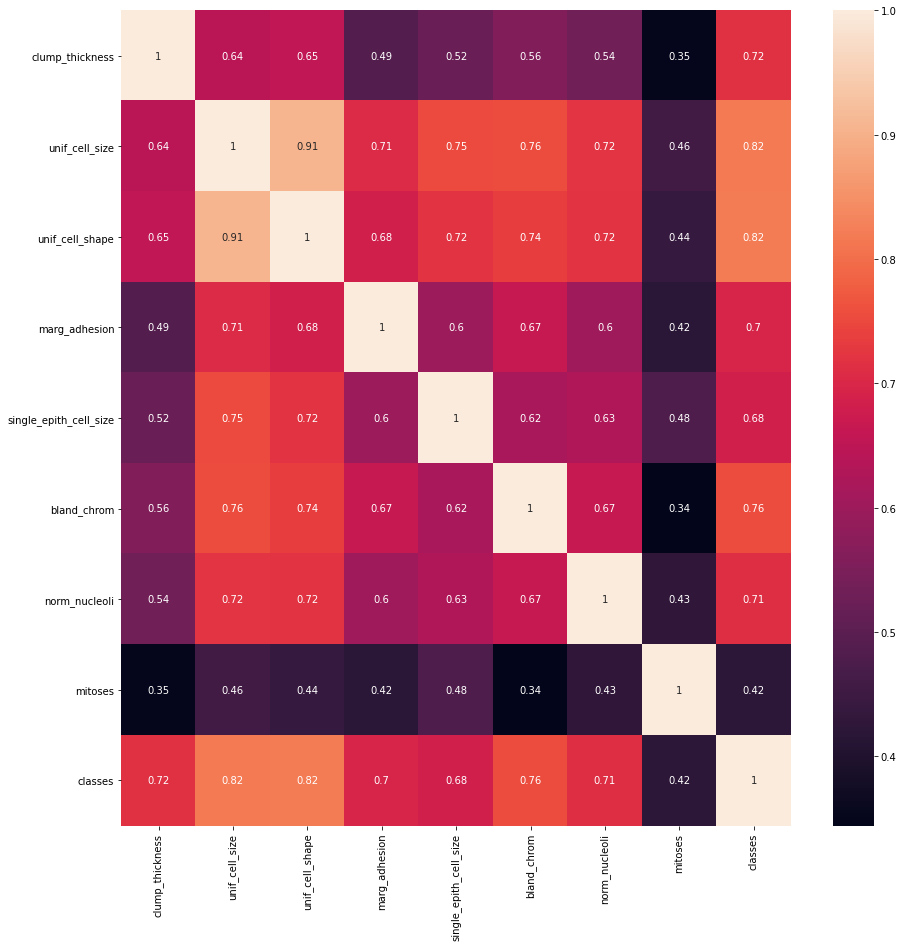

In [11]:
plt.figure(figsize=(15,15)) 
sns.heatmap(df.iloc[:,:10].corr(), cbar=True, yticklabels=True, annot=True)

In [12]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state = 42)

In [13]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [14]:
#principle component analysis
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)
explained_variance=pca.explained_variance_ratio_

[[154  10]
 [  9  72]]
Accuracy score of train KNN
100.0
Accuracy score of test KNN
92.24489795918367
[[160   4]
 [ 15  66]]
Accuracy score of train KNN
97.79735682819384
Accuracy score of test KNN
92.24489795918367
[[160   4]
 [  7  74]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
95.51020408163265
[[160   4]
 [  7  74]]
Accuracy score of train KNN
96.47577092511013
Accuracy score of test KNN
95.51020408163265
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.91629955947137
Accuracy score of test KNN
97.55102040816327
[[160   4]
 [  2  79]]
Accuracy score of train KNN
96.69603524229075
Accuracy score of test KNN
97.5

Text(0, 0.5, 'Accuracy')

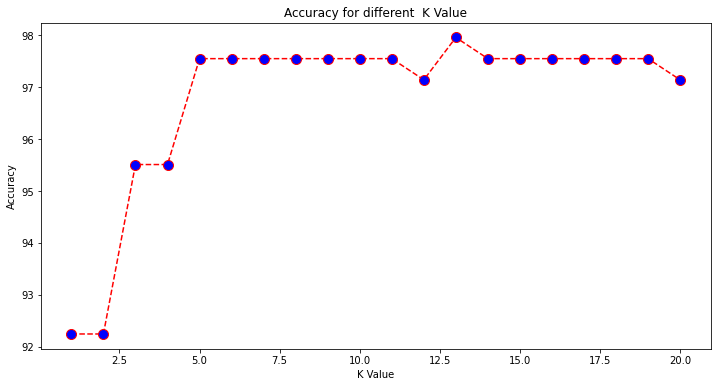

In [15]:
# Fitting KNN to the Training set
from sklearn.neighbors import KNeighborsClassifier
knn = []
for i in range(1,21):
            
    classifier = KNeighborsClassifier(n_neighbors=i)
    trained_model=classifier.fit(X_train,y_train)
    trained_model.fit(X_train,y_train )
    
    # Predicting the Test set results
    
    y_pred = classifier.predict(X_test)
    
    # Making the Confusion Matrix
    
    from sklearn.metrics import confusion_matrix
    
    cm_KNN = confusion_matrix(y_test, y_pred)
    print(cm_KNN)
    print("Accuracy score of train KNN")
    print(accuracy_score(y_train, trained_model.predict(X_train))*100)
    
    print("Accuracy score of test KNN")
    print(accuracy_score(y_test, y_pred)*100)
    
    knn.append(accuracy_score(y_test, y_pred)*100)
    
plt.figure(figsize=(12, 6))  
plt.plot(range(1, 21),knn, color='red', linestyle='dashed', marker='o',  
             markerfacecolor='blue', markersize=10)
plt.title('Accuracy for different  K Value')  
plt.xlabel('K Value')  
plt.ylabel('Accuracy') 

In [16]:
# Fitting SVM to the Training set
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)

trained_model=classifier.fit(X_train,y_train)
trained_model.fit(X_train,y_train )

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [17]:
# Predicting the Test set results\
y_pred = classifier.predict(X_test)

In [18]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm_SVM = confusion_matrix(y_test, y_pred)

print(cm_SVM)
print("Accuracy score of train SVM")
print(accuracy_score(y_train, trained_model.predict(X_train))*100)

print("Accuracy score of test SVM")
print(accuracy_score(y_test, y_pred)*100)


[[160   4]
 [  4  77]]
Accuracy score of train SVM
96.47577092511013
Accuracy score of test SVM
96.73469387755102
